<a href="https://colab.research.google.com/github/A-Lanza/Forms/blob/main/Copia_de_00_trabajando_con_pandas_es___ANALANZA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gestión de la Educación Virtual
 Preparado por: Servio Palacios, Ph.D.
## Ejemplos Básicos de Pandas
### Instrucciones:
Tu trabajo consistirá en evaluar y entender cada una de las celdas utilizando Anaconda y Google Colab.
En adición, debes traducir las sentencias print que están en Inglés y debes compartir el notebook publicado en colab para su evaluación.

Este cuaderno te guiará a través de algunos conceptos muy básicos de Pandas. Comenzaremos importando las bibliotecas típicas de ciencia de datos:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

Una Series es como una lista o un arreglo unidimensional (1D), pero con un índice. Todas las operaciones se alinean según el índice.

In [ ]:
a = pd.Series(range(1,10))
b = pd.Series(["Yo","disfruto","usar","Python","y","Pandas","mucho","de","verdad"], index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0          Yo
1    disfruto
2        usar
3      Python
4           y
5      Pandas
6       mucho
7          de
8      verdad
dtype: object


Uno de los usos más frecuentes de las Series es en las series temporales. En las series temporales, el índice tiene una estructura especial: típicamente un rango de fechas o marcas de tiempo (datetimes). Podemos crear este tipo de índice con: `pd.date_range`.

Supongamos que tenemos una serie que muestra la cantidad de producto comprada cada día, y sabemos que cada domingo también necesitamos tomar un artículo para nosotros mismos. Así es como podemos modelar eso usando una serie:

La cantidad de días en el índice es 366


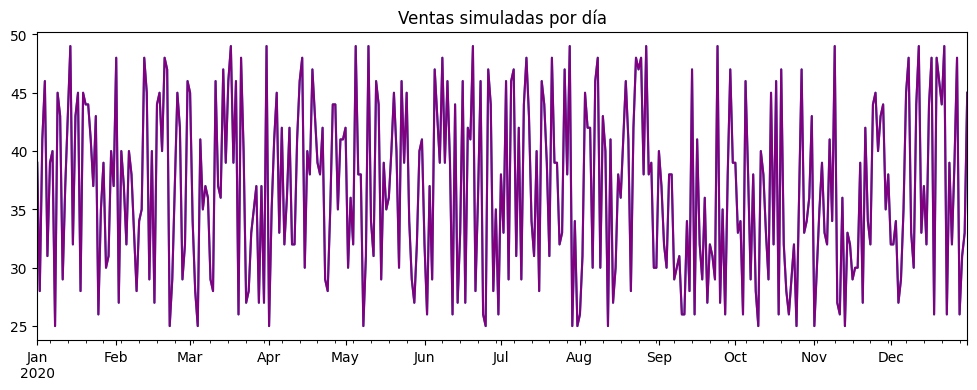

In [ ]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"La cantidad de días en el índice es {len(idx)}")
# print(idx)
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
items_sold.plot(title="Ventas simuladas por día", figsize=(12,4), color='purple')
plt.show()

In [ ]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Artículos adicionales (10 cada semana):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total de artículos (suma de dos series):\n{total_items}")


Artículos adicionales (10 cada semana):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total de artículos (suma de dos series):
2020-01-0

Como puedes ver, estamos teniendo problemas aquí, porque en la serie semanal los días no mencionados se consideran como ausentes (NaN), y al sumar `NaN` con un número obtenemos `NaN`. Para obtener un resultado correcto, necesitamos especificar `fill_value` al sumar las series:

Total de artículos vendidos por día (con artículos adicionales incluidos):
2020-01-01    39.0
2020-01-02    28.0
2020-01-03    41.0
2020-01-04    46.0
2020-01-05    41.0
              ... 
2020-12-27    58.0
2020-12-28    26.0
2020-12-29    31.0
2020-12-30    33.0
2020-12-31    45.0
Length: 366, dtype: float64


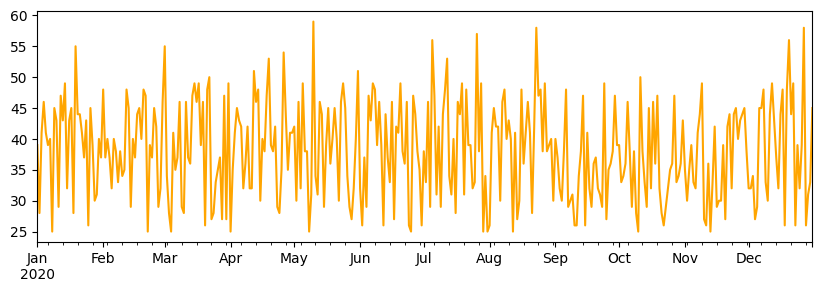

In [ ]:
total_items = items_sold.add(additional_items,fill_value=0)
print("Total de artículos vendidos por día (con artículos adicionales incluidos):")
print(total_items)
total_items.plot(figsize=(10,3), color='orange')
plt.show()

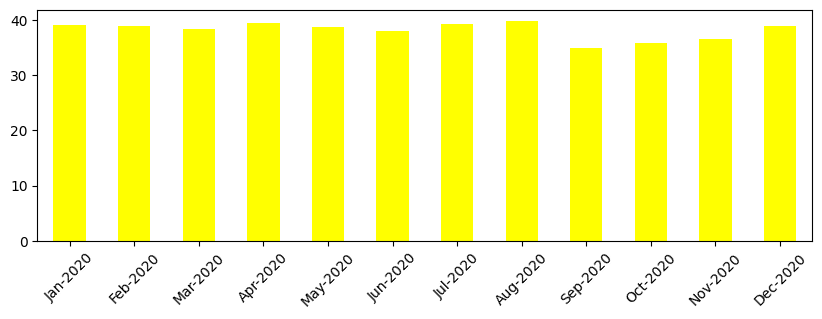

In [ ]:
monthly = total_items.resample("1ME").mean()
ax = monthly.plot(kind='bar',figsize=(10,3), color='yellow' )
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Un DataFrame es esencialmente una colección de Series que comparten el mismo índice. Podemos combinar varias series en un solo DataFrame. Dadas las series a y b definidas anteriormente:

In [ ]:
df = pd.DataFrame([a,b])
df

,0,1,2,3,4,5,6,7,8
0,1,2,3,4,5,6,7,8,9
1,Yo,disfruto,usar,Python,y,Pandas,mucho,de,verdad


También podemos usar Series como columnas y especificar los nombres de las columnas utilizando un diccionario:

In [ ]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

,A,B
0,1,Yo
1,2,disfruto
2,3,usar
3,4,Python
4,5,y
5,6,Pandas
6,7,mucho
7,8,de
8,9,verdad


El mismo resultado se puede lograr trasponiendo (y luego renombrando las columnas para que coincidan con el ejemplo anterior):

In [ ]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

,A,B
0,1,Yo
1,2,disfruto
2,3,usar
3,4,Python
4,5,y
5,6,Pandas
6,7,mucho
7,8,de
8,9,verdad


**Seleccionando columnas** del DataFrame puede ser efectuado de la siguiente manera:

In [ ]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
          B  A
0        Yo  1
1  disfruto  2
2      usar  3
3    Python  4
4         y  5
5    Pandas  6
6     mucho  7
7        de  8
8    verdad  9


**Selecting rows** based on filter expression:

In [ ]:
df[df['A']<5]

,A,B
0,1,Yo
1,2,disfruto
2,3,usar
3,4,Python


La forma en que funciona es que la expresión df['A']<5 devuelve una serie booleana, la cual indica si la expresión es True o False para cada elemento de la serie. Cuando una serie booleana se utiliza como índice, devuelve un subconjunto de filas del DataFrame. Por lo tanto, no es posible usar expresiones booleanas arbitrarias de Python; por ejemplo, escribir df[df['A']>5 and df['A']<7] sería incorrecto. En su lugar, debes usar la operación especial & sobre series booleanas:

In [ ]:
df[(df['A']>5) & (df['A']<7)]

,A,B
5,6,Pandas


**Creación de nuevas columnas calculables**. Podemos crear fácilmente nuevas columnas calculables en nuestro DataFrame utilizando expresiones intuitivas. El siguiente código calcula la divergencia de la columna A con respecto a su valor medio.

In [ ]:
df['DivA'] = df['A']-df['A'].mean()
df

,A,B,DivA
0,1,Yo,-4.0
1,2,disfruto,-3.0
2,3,usar,-2.0
3,4,Python,-1.0
4,5,y,0.0
5,6,Pandas,1.0
6,7,mucho,2.0
7,8,de,3.0
8,9,verdad,4.0


Lo que realmente sucede es que estamos calculando una serie y luego asignando esa serie al lado izquierdo de la expresión, creando así otra columna.

In [ ]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [ ]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

,A,B,DivA,LenB
0,1,Yo,-4.0,2
1,2,disfruto,-3.0,8
2,3,usar,-2.0,4
3,4,Python,-1.0,6
4,5,y,0.0,1
5,6,Pandas,1.0,6
6,7,mucho,2.0,5
7,8,de,3.0,2
8,9,verdad,4.0,6


**Seleccionar filas basadas en números** se puede hacer utilizando la estructura iloc. Por ejemplo, para seleccionar las primeras 5 filas del DataFrame:

In [ ]:
df.iloc[:5]

,A,B,DivA,LenB
0,1,Yo,-4.0,2
1,2,disfruto,-3.0,8
2,3,usar,-2.0,4
3,4,Python,-1.0,6
4,5,y,0.0,1


**Grouping** se utiliza a menudo para obtener un resultado similar a las tablas dinámicas en Excel. Supongamos que queremos calcular el valor medio de la columna A para cada número dado de LenB. Entonces podemos agrupar nuestro DataFrame por LenB y llamar a mean:

In [ ]:
df.groupby('LenB')['A'].mean()

,A
LenB,
1,5.000000
2,4.500000
4,3.000000
5,7.000000
6,6.333333
8,2.000000


Si necesitamos calcular el promedio y el número de elementos en el grupo, entonces podemos usar una función aggregate más compleja:

In [ ]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

,Count,Mean
LenB,,
1,1,5.000000
2,2,4.500000
4,1,3.000000
5,1,7.000000
6,3,6.333333
8,1,2.000000


## Printing and Plotting

El Científico de Datos a menudo tiene que explorar los datos, por lo tanto, es importante poder visualizarlos. Cuando el DataFrame es grande, muchas veces solo queremos asegurarnos de que estamos haciendo todo correctamente imprimiendo las primeras filas. Esto se puede hacer llamando a df.head(). Si lo ejecutas desde Jupyter Notebook, mostrará el DataFrame en una forma tabular agradable.

In [ ]:
df.head(10)

,A,B,DivA,LenB
0,1,Yo,-4.0,2
1,2,disfruto,-3.0,8
2,3,usar,-2.0,4
3,4,Python,-1.0,6
4,5,y,0.0,1
5,6,Pandas,1.0,6
6,7,mucho,2.0,5
7,8,de,3.0,2
8,9,verdad,4.0,6



También hemos visto el uso de la función plot para visualizar algunas columnas. Aunque plot es muy útil para muchas tareas y admite muchos tipos de gráficos mediante el parámetro kind=, siempre puedes usar directamente la biblioteca matplotlib para crear gráficos más complejos.


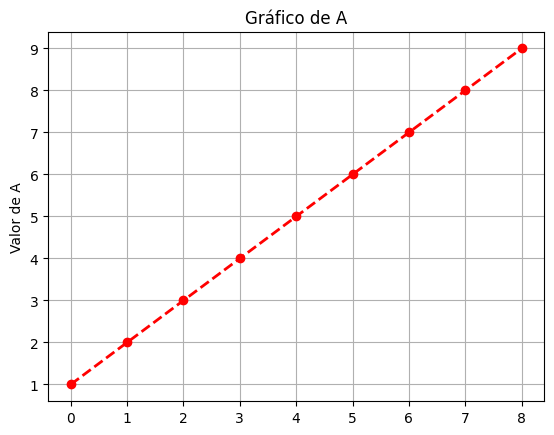

In [ ]:
df['A'].plot(color='red', linewidth=2, linestyle='--', marker='o', title='Gráfico de A')
plt.ylabel('Valor de A')
plt.grid(True)
plt.show()

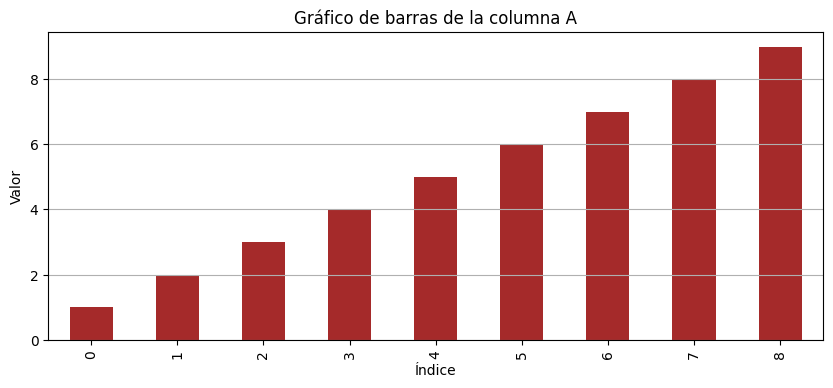

In [ ]:
df['A'].plot(kind='bar', color='brown', figsize=(10, 4), title='Gráfico de barras de la columna A')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.grid(axis='y')
plt.show()


Esta visión general cubre los conceptos más importantes de Pandas; sin embargo, la biblioteca es muy extensa y no hay límite para lo que puedes hacer con ella. ¡Ahora apliquemos este conocimiento para resolver un problema específico!